# Adaline

- Perceptron 알고리즘의 향상된 버전
- 가중치를 업데이트하는 데 퍼셉트론처럼 단위 계단 함수 대신 선형 활성화 함수를 사용하는 것
- 즉, 연속함수로 cost fucntion을 정의하고 최소화하는 개념 추가
- 최종 예측을 만드는 데 여전히 임계 함수는 사용한다.

#Adaline vs Perceptron

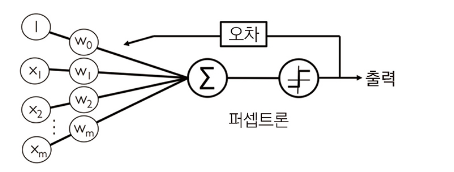

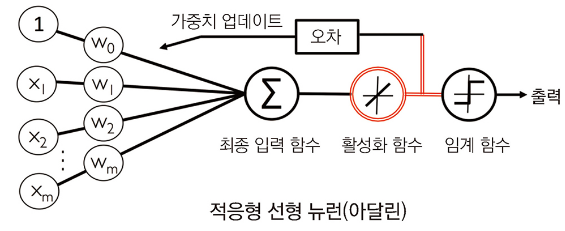

- 아달린은 진짜 클래스 레이블과 선형 활성화 함수의 실수 출력 값을 비교하여 모델의 오차를 계산하고 가중치를 업데이트한다.
- 퍼셉트론은 진짜 클래스 레이블과 예측 클래스 레이블을 비교한다.


#경사 하강법 개념 짚고가기

1. 경사 하강법으로 비용 함수를 최소화 시킬 것이다.
2. 종종 최소화하려는 비용함수가 목적 함수가 된다.
3. 아달린은 계산된 출력과 진짜 클래스 레이블 사이의 제곱 오차합으로 가중치를 학습할 비용 함수 J를 정의한다,

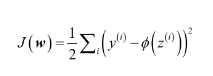

-> 1/2 항은 다음 문단에서 설명할 그래디언트를 간소하게 만들려고 편의상 추가한 것

-> 단위 계단 함수 대신 연속적인 선형 활성화 함수를 사용하는 장점은 비용 함수가 미분 가능해진다는 것

-> 비용함수는 볼록 함수가 된 것

-> 경사 하강법을 적용하면 비용함수를 최소화하는 가중치를 찾을 수 있다.

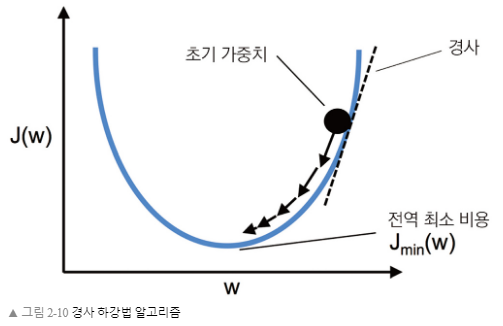

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 아달린 구현

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class AdalineGD(object):
  '''
  적응형 선형 뉴런 분류기

  eta : float
  n_iter : int (= epoch)
  random_state : int

  * 추가된 점 *
  w_ : 1d-array (학습된 가중치)
  cost_ : list (epoch마다 누적된 비용 함수의 제곱합)
  '''

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    '''
    훈련 데이터 학습

    매개변수
    --------------
    self : object
    X : {array-like}, shape = [n_samples, n_features]           <- 훈련 데이터
    y : array-like, shape = [n_samples]                         <- 타깃 값
    '''
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.cost_ = []

    # 퍼셉트론처럼 개별 훈련 샘플마다 평가한 후 가중치를 업데이트하지 않고 전체 훈련 데이터셋을 기반으로 그래디언트를 계산
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      # 가중치 1 ~ m 까지는 learning rate * errors.sum()
      self.w_[1:] += self.eta*X.T.dot(errors)
      # 절편(0 째 가중치) 은 learning rate * errors.sum()
      self.w_[0] += self.eta*errors.sum()
      # 아래 cost가 J(w)가 된다.
      cost =  (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    """최종 입력 계산
       전 epoch에서 계산된 w를 가지고 한다.
    """
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    '''선형 활성화 계산'''
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [12]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/flower/iris.data', header=None)
df.columns = [0,1,2,3,4]
print(df.head())
print(df.tail())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [13]:
# setosa와 versicolor를 훈련 dataset 결과값에 넣는다.
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [14]:
# feature 0 : 꽃받침 길이
# feature 1 : 
# feature 2 : 꽃잎 길이
# feature 3 : 
# 꽃받침 길이와 꽃임 길이를 추출한다. 
# 0과 2라는 것은 0~1이 아니라 feature 0, feature 2를 말하는 것
X = df.iloc[0:100, [0, 2]].values
X[:5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

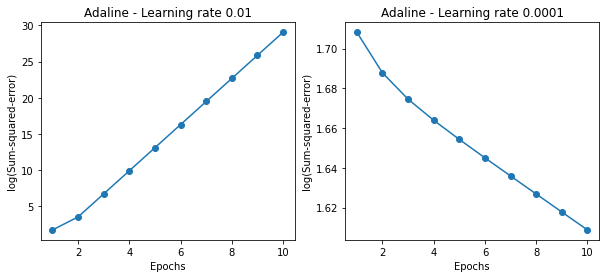

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

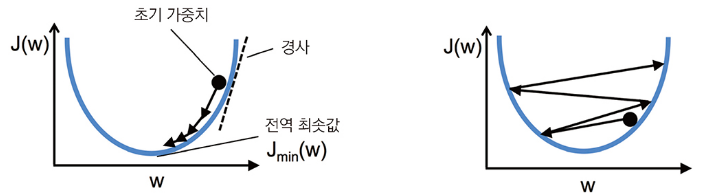

- learning rate 0.01 : epoch이 커질 수록 error가 증가 ( 전역 최솟값을 지나쳤기 때문)
- learning rate 0.0001 : epoch이 커질 수록 error가 감소


전역 최솟값이란 비용함수(볼록함수)의 Gradient가 0이 되는 부분 



- 위 그래프를 봤을 때 오른쪽이 learning rate 0.01 일 때 ( 너무 큰 학습률을 선택했을 때 )
- 위 그래프를 봤을 때 왼쪽이 learning rate 0.0001 일 때 ( 적절하게 학습률을 선택한 경우 )

# 특성 스케일을 조정하여 경사하강법 결과 향상

- 경사 하강법은 특성 스케일을 조정하여 혜택을 볼 수 있는 알고리즘 중 하나이다.

- 그 방법 중 표준화에 대해서 알아본다.

방법 : 데이터에 표준 정규 분포의 성질을 부여하여 경사 하강법 학습이 좀 더 빠르게 수렴되도록 돕는다.

In [18]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [19]:
# 특성을 표준화합니다.
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

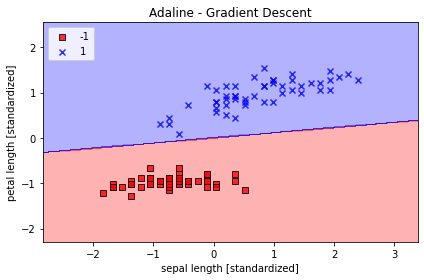

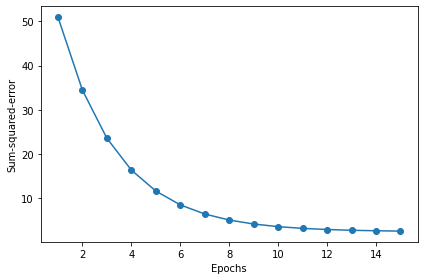

In [20]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

- Learning rate = 0.01 을 사용하고 표준화된 특성에서 훈련하니 아달린 모델이 수렵했다.

#대규모 머신러닝, 확률적 경사 하강법

In [23]:
class AdalineSGD(object):
    """ADAptive LInear NEuron 분류기

    Parameters
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    shuffle : bool (default: True)
      True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞습니다
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    Attributes
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      모든 훈련 샘플에 대해 에포크마다 누적된 평균 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """훈련 데이터 학습

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃 벡터

        반환값
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    # 스트리밍 데이터를 사용하는 온라인 학습 방식으로 모델을 훈련하려면 개개의 샘플마다 partial_fit 메서드를
    # 호출하면 된다.
    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습합니다"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """훈련 데이터를 섞습니다"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """랜덤한 작은 수로 가중치를 초기화합니다"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """아달린 학습 규칙을 적용하여 가중치를 업데이트합니다"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

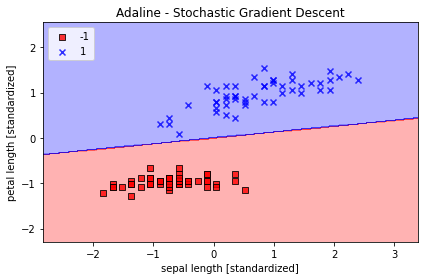

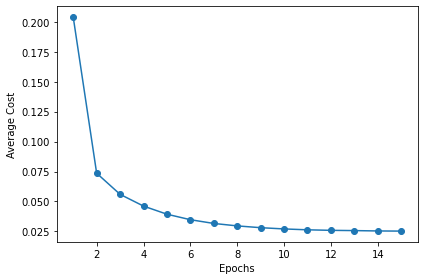

In [24]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()